In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style 
#style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
data = api.rate_limit_status()

In [3]:
# Target Search Term
target_users = ("@BBC", "@CBS", "@CNN",
                "@Fox", "@nytimes")

#Create empty lists 

compound_list = []
positive = []
neutral = []
negative = []
date_list = []
sentiment_list = []
text=[]
source = []
tweet_count = []
  
#Loop through twitter handles

for target in target_users:
    
    account_name = target
    account_tweets = api.user_timeline(target, count = 100, result_type = "recent")
    
#create a counter 

    index = 0
    
 #get polarity values

    for tweet in account_tweets:
        
        org = target
        
        #get scores
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        date=tweet["created_at"]
        
        #increment counter 
        
        index =index + 1
        
        #append to lists 
        
        compound_list.append(compound)
        positive.append(pos)
        negative.append(neg)
        neutral.append(neu)
        date_list.append(date)    
        source.append(org)
        tweet_count.append(index)
        text.append(tweet['text'])
        
        
        

In [4]:
#create data frame 

sentiments_pd=pd.DataFrame(source, columns=["News Outlet"])
sentiments_pd["Date"]=date
sentiments_pd["Tweet Text"]=text
sentiments_pd["Compound"]=compound_list
sentiments_pd["Positive"]=positive
sentiments_pd["Negative"]=negative
sentiments_pd["Neutral"]=neutral
sentiments_pd["Tweets Ago"]=tweet_count

sentiments_pd['News Outlet'].unique()

sentiments_pd.to_csv("sentiments.csv", index=False)

print(sentiments_pd['News Outlet'].value_counts()[1])

100


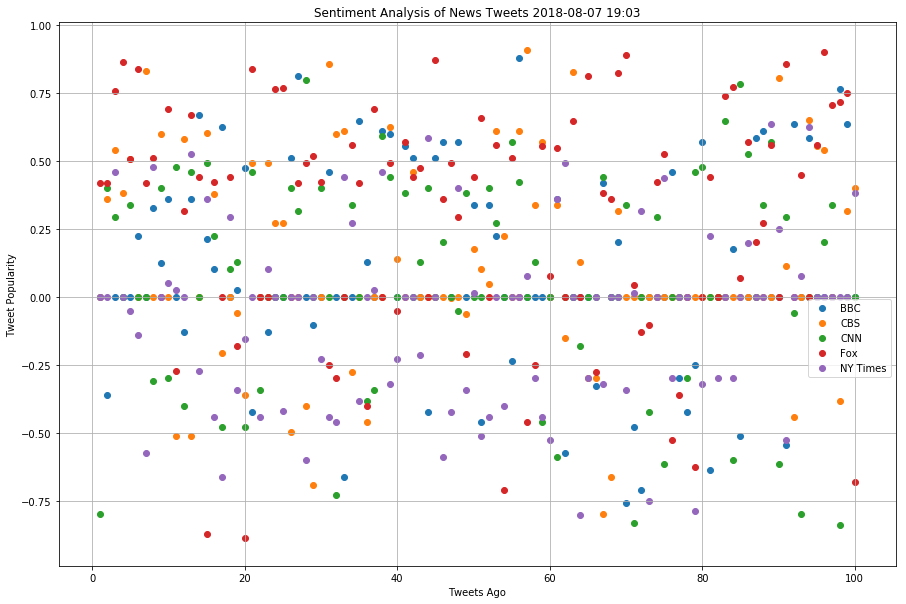

In [5]:
#create data frames by outlet, then plot
plt.figure(figsize = (15,10))
bbc_pd = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@BBC']
plt.scatter(bbc_pd['Tweets Ago'], bbc_pd['Compound'], label='BBC')

cbs_pd = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@CBS']
plt.scatter(cbs_pd['Tweets Ago'], cbs_pd['Compound'], label='CBS')

cnn_pd = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@CNN']
plt.scatter(cnn_pd['Tweets Ago'], cnn_pd['Compound'], label='CNN')

foxnews_pd = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@Fox']
plt.scatter(foxnews_pd['Tweets Ago'], foxnews_pd['Compound'], label='Fox')

nytimes_pd = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@nytimes']
plt.scatter(nytimes_pd['Tweets Ago'],nytimes_pd['Compound'], label='NY Times')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f'Sentiment Analysis of News Tweets {now}')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Popularity')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('images/News_Analysis.png')
plt.show()


<Container object of 5 artists>

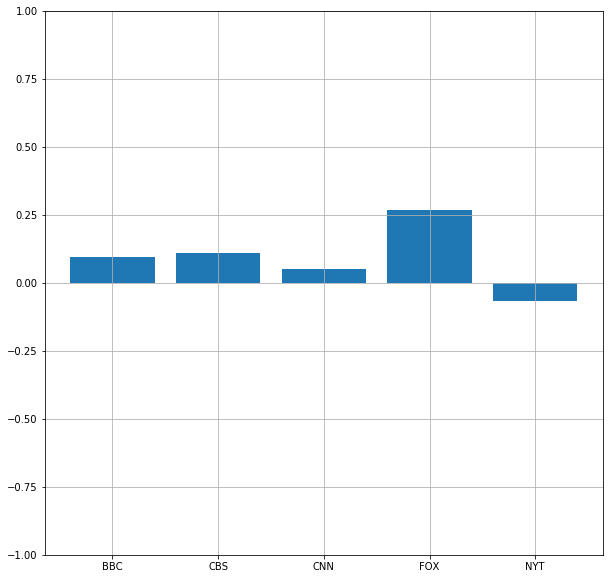

In [6]:
#get the averages 
bbc_agg = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@BBC']['Compound'].mean()
cbs_agg = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@CBS']['Compound'].mean()
cnn_agg = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@CNN']['Compound'].mean()
fox_agg = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@Fox']['Compound'].mean()
nytimes_agg = sentiments_pd.loc[sentiments_pd['News Outlet'] == '@nytimes']['Compound'].mean()

#plot the average scores 

x_vals=['BBC','CBS','CNN','FOX','NYT']
y_vals=[bbc_agg,cbs_agg,cnn_agg,fox_agg,nytimes_agg]
plt.figure(figsize = (10,10))
plt.ylim(-1,1)
plt.grid()
plt.xlabel = ('News Outlet')
plt.ylabel = ('Overall Score')
plt.savefig('images/news_averages.png')
plt.bar(x_vals,y_vals,)
